In [291]:
# ---- PART-1-----------------------
#import pandas library
import pandas as pd

#read in data from csv files
article_data = pd.read_csv('articleInfo.csv')
author_data = pd.read_csv('authorInfo.csv')

In [292]:
#merge data based on article number
merged_data = article_data.merge(author_data, how = 'outer', on = 'Article No.')

#fill in all the missing information with zeroes
merged_data = merged_data.fillna(0)

#print data after info with zeroes is added
merged_data

,Article No.,Title,Year,Author Number,Key Words,Citation,Source,Abstract,Type,Author Name,Author Affiliation,Country,h-index
0,1,Study of Virtual Reality Immersive Technology ...,2022,3.0,"virtual reality technologies, mathematics lear...",7.0,FRONTIERS IN PSYCHOLOGY,Mathematics is an important foundation for the...,Journal,Yu-Sheng Su,National Taiwan Ocean University,Taiwan,0.0
1,1,Study of Virtual Reality Immersive Technology ...,2022,3.0,"virtual reality technologies, mathematics lear...",7.0,FRONTIERS IN PSYCHOLOGY,Mathematics is an important foundation for the...,Journal,Hung-Wei Cheng,National Taiwan Ocean University,Taiwan,0.0
2,1,Study of Virtual Reality Immersive Technology ...,2022,3.0,"virtual reality technologies, mathematics lear...",7.0,FRONTIERS IN PSYCHOLOGY,Mathematics is an important foundation for the...,Journal,Chin-Feng Lai,National Cheng Kung University,Taiwan,0.0
3,2,Factors Influencing Nursing Students' Immersiv...,2021,2.0,virtual reality; learning; immersive media tec...,3.0,SENSORS,Background/objectives: This study aims to iden...,Journal,Youngju Kim,Daejeon Health Institute of Technology,Korea,0.0
4,2,Factors Influencing Nursing Students' Immersiv...,2021,2.0,virtual reality; learning; immersive media tec...,3.0,SENSORS,Background/objectives: This study aims to iden...,Journal,Sung Yun Ahn,Pai Chai University,Korea,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,160,Virtual reality enhances safety training in th...,2022,2.0,non-WEIRD sample; safety training; simulation;...,3.0,Journal of Computer Assisted Learning,Objective: Many industries struggle with train...,Journal,0,0,0,0.0
467,161,Virtual reality for developing intercultural c...,2022,3.0,Affective domain; Cultural competence; Instruc...,1.0,Educational Technology Research & Development,Intercultural communicative competence (ICC) i...,Journal,0,0,0,0.0
468,162,Virtual reality in problem-based learning cont...,2021,3.0,English learning; motivation; problem-based le...,27.0,Journal of Computer Assisted Learning,Learning a foreign language requires interacti...,Journal,0,0,0,0.0
469,163,Virtual reality is more efficient in learning ...,2020,8.0,Virtual reality; Education; Human heart anatomy,36.0,New Ideas in Psychology,New technologies make their way into education...,Journal,0,0,0,0.0


Year
2017     13
2018     23
2019     26
2020     93
2021    133
2022    183
Name: Title, dtype: int64

Question 1. 


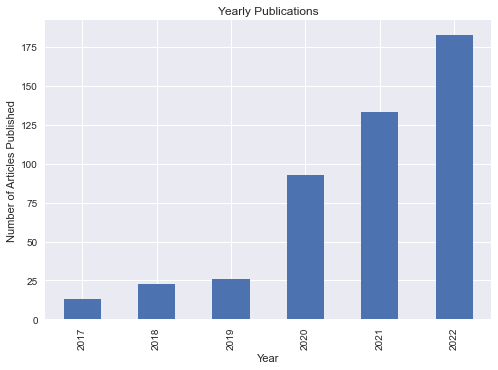

In [293]:
#import matplot library
import matplotlib.pyplot as plt

#cut and display data regarding articles published yearly
year = merged_data.sort_values('Year', ascending = False)
article_no_df = year.groupby('Year')['Title'].count()
print(article_no_df)

#plot bar graph with yearly publications
article_no_df.plot(kind = 'bar')
plt.ylabel('Number of Articles Published')
print()
print('Question 1. ')
plt.title('Yearly Publications')
plt.show()

Year
2017    3788.0
2018    1974.0
2019    1933.0
2020    2305.0
2021    1735.0
2022     469.0
Name: Citation, dtype: float64

Question 2. 


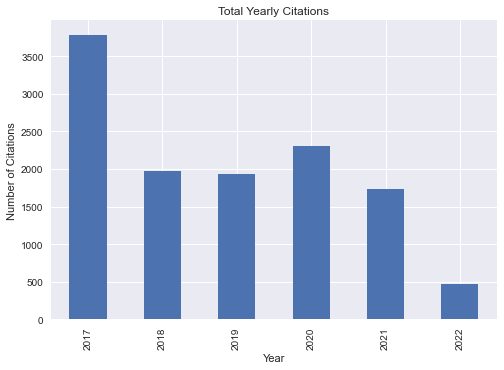

In [294]:
#cut and display data regarding number of citations made yearly
year = merged_data.sort_values('Year', ascending = False)
citation_no_df = year.groupby('Year')['Citation'].sum()
print(citation_no_df)

#plot bar graph with yearly citations
citation_no_df.plot(kind = 'bar')
print()
print("Question 2. ")
plt.ylabel('Number of Citations')
plt.title('Total Yearly Citations')
plt.show()

    Number of Publications Per Country
                     Country  Publications
0                  Australia            13
1                    Bristol             1
2                     Canada            12
3                      Chile             9
4                      China            35
5                     Cyprus             7
6             Czech Republic            15
7                     France             7
8                    Germany            26
9                     Greece             5
10                 Hong Kong             8
11                     India             3
12                   Ireland            17
13                     Italy            19
14                     Korea             3
15                Kyrgyzstan             1
16             Liechtenstein             2
17                  Malaysia             6
18                    Mexico             3
19               New Zealand             6
20                    Norway             2
21             

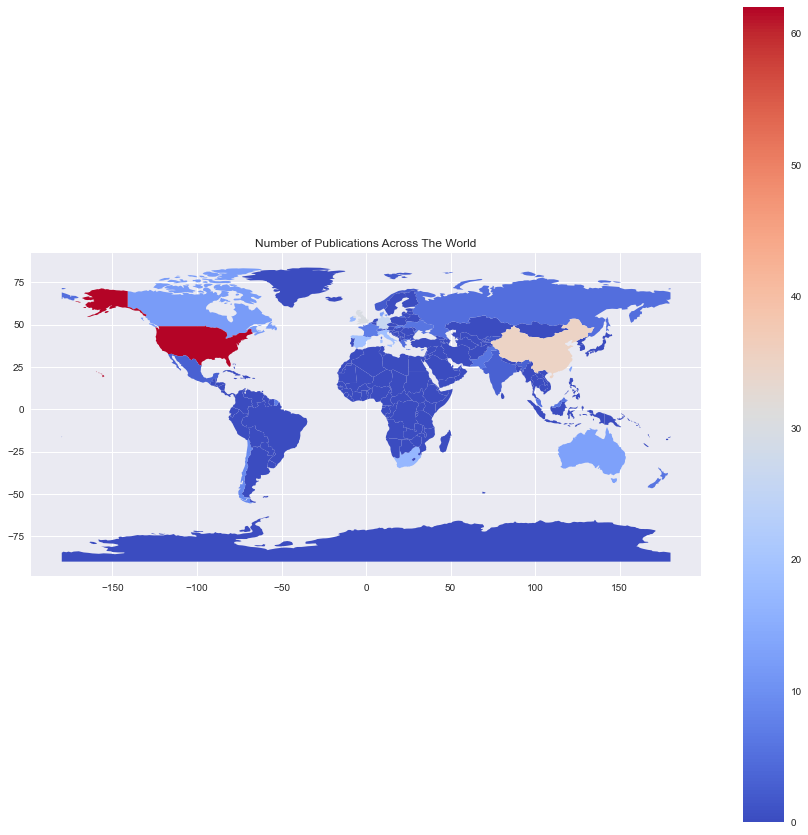

In [295]:
#create series only with countries and number of publications
yearly_publications = merged_data.groupby('Country')['Title'].count()

#clean up series by getting rid of redundacies and mispelled countries, cleans up data
yearly_publications = yearly_publications.drop(0)
yearly_publications = yearly_publications.drop('Chian')
yearly_publications['China'] = 35
yearly_publications = yearly_publications.drop('Chile ')
yearly_publications['Chile'] = 9
yearly_publications = yearly_publications.drop('Denamrk')
yearly_publications = yearly_publications.drop('Denmark ')
yearly_publications['Denmark'] = 13
yearly_publications = yearly_publications.drop('Spain ')
yearly_publications ['Spain'] = 19
yearly_publications = yearly_publications.drop('USA')
yearly_publications ['United States of America'] = 62
yearly_publications = yearly_publications.drop('Israel ')
yearly_publications['Israel'] = 1
yearly_publications = pd.DataFrame(yearly_publications).reset_index()
yearly_publications.columns= ['Country', 'Publications']

#display yearly publication data
print('    Number of Publications Per Country')
print(yearly_publications)

#merge map data with publication data and plot on world map in cool warm color scheme
merged = world.merge(yearly_publications, left_on='name', right_on='Country', how='outer')
merged['Publications'] = merged['Publications'].fillna(0)
merged.plot(column='Publications', cmap = 'coolwarm', figsize = (15,15), legend = True)
plt.title("Number of Publications Across The World")
print()
print("Question 3. ")
print()
plt.show()

In [296]:
#group data based on institution
sources = merged_data.groupby('Author Affiliation').size()
sources = sources.drop(0)
sources = pd.DataFrame(sources).reset_index()
sources.columns= ['Author Affiliation', 'Number of Publications']

#sort data and print top 5 institutions based on number of publications
sorted_sources = sources.sort_values('Number of Publications', ascending = False).head(5)
sorted_sources = pd.DataFrame(sorted_sources).reset_index(drop=True)
print("Question 4. ")
print()
print('     Top 5 Institutions Based on Number of Publications')
print(sorted_sources)


Question 4. 

     Top 5 Institutions Based on Number of Publications
                    Author Affiliation  Number of Publications
0       University of the Western Cape                      17
1                   Masaryk University                      12
2              University College Cork                      11
3                    Intel Corporation                      11
4  The Chinese University of Hong Kong                       8


In [297]:
#group data based on author name and average h index
author_hindex = merged_data.groupby('Author Name')['h-index'].mean()
author_hindex = author_hindex.drop(0)
author_hindex = pd.DataFrame(author_hindex).reset_index()
author_hindex.columns = ['Author Name', 'Average H Index']

#sort data and print top 5 authors with highest h index
author_hindex = author_hindex.sort_values('Average H Index', ascending = False).head(5)
author_hindex = pd.DataFrame(author_hindex).reset_index(drop=True)
print("Question 5. ")
print()
print('Top 5 Researchers with Highest Average H Score')
print(author_hindex)

Question 5. 

Top 5 Researchers with Highest Average H Score
           Author Name  Average H Index
0     Ulrich Trautwein             95.0
1     Nicolas Molinari             63.0
2     George S. Athwal             59.0
3  Maria Luisa Lorusso             33.0
4  Vicente A. González             33.0


In [298]:
# ---- PART-2-----------------------

#necessary import statements for regression training
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
import statsmodels.api as sm

#read in data.csv file and fill in 0s for missing information
df = pd.read_csv('data.csv')
df.isna().sum()
df = df.fillna(0)

x = df.drop(columns='SUS') # predictor variables
y = df['SUS'] # dependent variable

#add constant to predictor variables, use OLS
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
print(model.summary());

#set dependent and independent variables and train linear regression model
x = df[['ASR_Error', 'Intent_Error', 'Duration', 'Gender', 'Purchase']]
y = df[['SUS']]
x_train, x_test, y_train, y_test = train_test_split(x, y)
lr_model = LinearRegression().fit(x_train,y_train)

#print correlation coefficients of variables
print("Linear Regression Model Coefficients")
print(pd.DataFrame(lr_model.coef_.transpose(), x.columns, columns = ['Coefficients']))

print()
print("The R squared score of the model is: ", lr_model.score(x_test, y_test))

                            OLS Regression Results                            
Dep. Variable:                    SUS   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     27.39
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           5.25e-17
Time:                        18:52:21   Log-Likelihood:                -362.39
No. Observations:                 100   AIC:                             736.8
Df Residuals:                      94   BIC:                             752.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           93.0282      5.541     16.788   

/Users/meganshah/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


-----Part 2 Questions------

1. Look at trained regression model in part 2

2. The feautures that are significant are the ASR_Error and the Intent_Error. This can be proved using the p values associated with these variables. If the p value is less than 0.05 it is considered to be significant, and the p value for these two variables follow this stadard.

3. The results followed most of my expectations. Although I think purchasing a ticket via Siri is somewhat indicative of a user's use of Siri's, I think there are other ways that users can interact with Siri that might be more popular which is why I assumed it wouldn't be as significant of a factor. Duration was somewhat similar, just because Siri was open does not mean that the user was using Siri throughout thus time. I also didn't think gender would be a persuading or dissuading factor from using Siri. However, I believe that whether a user has a positive or negative experience wiht Siri would definitely affect whether they use it in the future. SUS was the dependent variable that measured if users used Siri for their needs. The results indicated which variables were most significant and so I believe they fell within what I expected.

4. The most influential factors were ASR_Error and Intent_Error. These are the most influential because of the p value. Because the p value for ASR_Error (0.001) and the p value for Intent_Error (0.000) are both less than 0.05 they are significant and therefore influential values.

5. It makes sense that these values are influential and significant because I feel as though a speaker's past interactions with Siri would greatly affect their future interactions and how often they would rely on Siri to help them accomplish their task. For example, if a user decided to rely on Siri to ask it a question about the weather and Siri didn't understand the question or misunderstood what the user was saying, the user would be dissuaded to us Siri again in the future because of this negative experience.

In [303]:
# ---- PART-3-----------------------
#use same data from part 2
#scale data
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split

scale = StandardScaler()
scaled_X = scale.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3)

#necessary import statements
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report

import matplotlib.pyplot as plt

#set independent and dependent variables
y = df['Purchase']
x = df.drop(columns= ['SUS', 'Purchase']) # predictor variables y = df['Purchase']

#4 classification models are initialized to be used later
lc = LogisticRegression()
svc = SVC(probability=True)
nbc = GaussianNB()
rfc = RandomForestClassifier()



              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.94      0.94      0.94        16

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

              precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.93      0.81      0.87        16

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30

              precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.93      0.81      0.87        16

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30

              preci

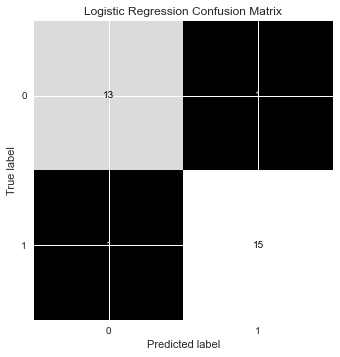

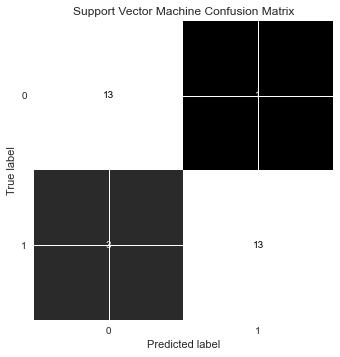

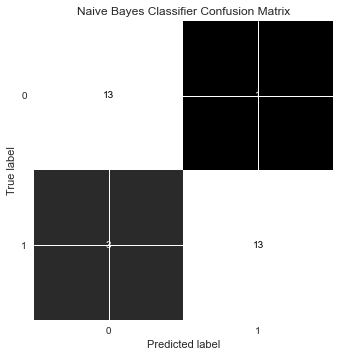

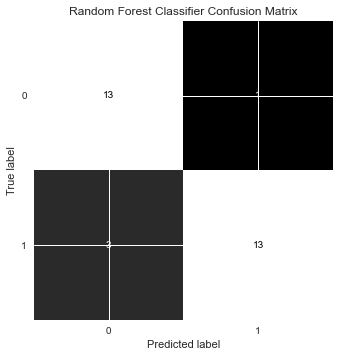

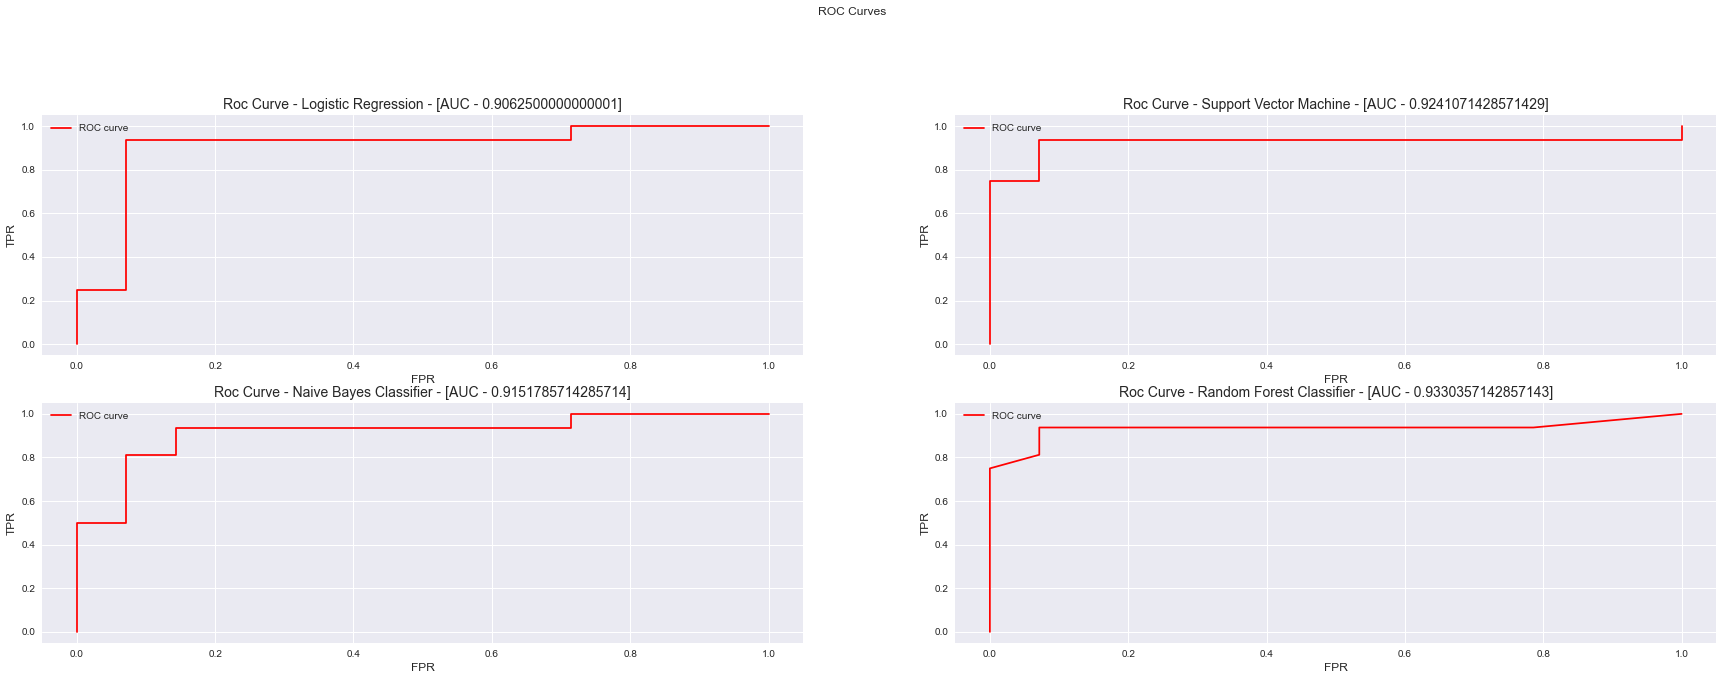

In [304]:
#evaluating the classification model with confusion matrix and ROC
print(classification_report(y_test, y_lc_predicted))
print(classification_report(y_test, y_svc_predicted))
print(classification_report(y_test, y_nbc_predicted))
print(classification_report(y_test, y_rfc_predicted))

models = ['Logistic Regression', 'Support Vector Machine', 'Naive Bayes Classifier', 'Random Forest Classifier']
predictions = [y_lc_predicted, y_svc_predicted, y_nbc_predicted, y_rfc_predicted]
pred_probabilities = [y_lc_pred_proba, y_svc_pred_proba, y_nbc_pred_proba, y_rfc_pred_proba]

plot = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(), prediction))
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.ax_.set_title(f"{model} Confusion Matrix")

plt.figure(figsize=(30, 15))
plt.suptitle("ROC Curves")
plot_index = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
    auc_score = auc(fpr, tpr)
    plt.subplot(3, 2, plot_index)
    plt.plot(fpr, tpr, 'r', label='ROC curve')
    # pyplot.figure(figsize=(5, 5))
    plt.title(f'Roc Curve - {model} - [AUC - {auc_score}]', fontsize=14)
    plt.xlabel('FPR', fontsize=12)
    plt.ylabel('TPR', fontsize=12)
    plt.legend()
    plot_index += 1
plt.show()